# Python商务数据分析——课后作业2

**姓名：张三&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;学号：xxx**
>练习主题：Python基础编程
>练习目的：
>- 函数定义与使用
    * 掌握函数的定义和调用方法
    * 掌握变量的作用域
>- 文件操作
    * 文件夹的操作
    * 文件的读写操作
<font color="red">请发送至：<b>teaching\_jin\@126.com</b> ，邮件标题和附件标题均为：<b>Python商务数据分析_学号\_姓名\_课后作业2</b></font>

### 1 编写函数，实现如下组合计算公式：


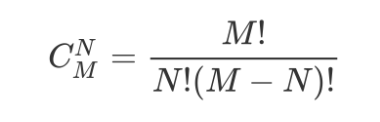

In [41]:
#代码

def factorial(n: int) -> int:
    result = 1
    if n >= 0:
        for i in range(n):
            result = result * (i + 1)
        return result
    else:
        raise ValueError('Please input integer greater than 0')

def C(M: int, N: int) -> int:
    if M == N:
        return 1
    elif M > N:
        return factorial(M) / (factorial(N) * factorial(M - N))
    else:
        raise ValueError(f'M should be greater than or equal to N. But M is {M}, N is {N}.')

def main(M, N):
    try:
        print(f'(M, N) is ({M}, {N}): Result is', C(M, N))
    except ValueError as e:
        print(e)


M = int(input('请输入M'))
N = int(input('请输入N'))
main(M, N)

# t1 = (5, 3)
# t2 = (2, 6)
# t3 = (3, 3)

# for _ in t1, t2, t3:
#     test(_)


(M, N) is (10, 2): Result is 45.0


### 2 查找特定类型文件文件
> 编写函数，实现如下功能：对于给定目录，查找该目录下（包括子目录）中指定后缀(如".doc",".docx")的文件，将这些文件打印到控制台

In [44]:
#代码

from inspect import findsource
import os

def find_suffix(DIR, *suffix):
    dir_list = os.listdir(os.path.join(DIR))
    for f in [_ for _ in dir_list if _.endswith(suffix)]:
        print(f)


DIR = input('请输入目标目录：')
suffix = []
while True:
    ipt = input('请输入后缀，所有后缀输入完毕后输入q开始运行：')
    if ipt == 'q':
        break
    elif not ipt.startswith('.'):
        print('请输入以“.”为起始的后缀名称')
    else:
        suffix.append(ipt)

try:
    find_suffix(DIR, *suffix)
except FileNotFoundError as e:
    print('请输入正确路径', e)

请输入以“.”为起始的后缀名称
请输入以“.”为起始的后缀名称
请输入正确路径 [Errno 2] No such file or directory: '123'


### 3 文件读写操作
> 基于给定代码生成数字文件number.txt
> 读出numbres.txt中所有的数据，（1）查找出出现次数最多的50个数，并将这些数写入文件top50.txt；（2）查找出最大的50个数，并将这些书写入max50.txt。

```python
# 生成number.txt
import random
with open("e:\\number.txt","w",encoding="utf-8") as file:
    for _ in range(1000000):
        for _ in range(0,random.randint(1,100)):
            file.write(str(random.randint(1,10000000))+",")
        file.write("\n")
```

In [1]:
#代码

def top50(src_path):
    with open(src_path, "r", encoding="utf-8", ) as file:
        lines = file.readlines()

    count = {}

    for line in lines:
        numbers = line.rstrip('\n').rstrip(',').split(',')
        for number in numbers:
            count[number] = count.get(number, 0) + 1

    sort = sorted(count.items(), key=lambda item: item[1], reverse=True)
    top50 = [_[0] + '\n' for _ in sort[:50]]

    with open('top50.txt', 'w', encoding='utf-8') as fw:
        fw.writelines(top50)

def max50(src_path):
    with open(src_path, "r", encoding="utf-8", ) as file:
        lines = file.readlines()
    
    queue = []

    for line in lines:
        numbers = line.rstrip('\n').rstrip(',').split(',')
        queue += numbers

    sort = sorted(queue, reverse=True)
    max50 = [_ + '\n' for _ in sort[:50]]

    with open('max50.txt', 'w', encoding='utf-8') as fw:
        fw.writelines(max50)


DIR = input('请输入读取目录：')
top50(DIR)
max50(DIR)

### Enjoy~